# Search Evaluation Notebook

This python notebook will perform a search evaluation
Prerequisites:
* Golden data set in file ```golden_data.csv```
* Search strategies in python modules located in the ```strategies``` folder
* ```.env``` file with the following:

```
ES_SERVER="https://YOUR_ELASTICSEARCH_8_17_or_higher:443"
ES_API_KEY="ENCODED_API_KEY"

PROXY_BASE_URL="YOUR_KEY"
OPENAI_API_KEY="YOUR_KEY"
COHERE_KEY="YOUR_KEY"
```

In [1]:
## Set up the environment variables before importing utilities
from dotenv import load_dotenv
load_dotenv()


True

In [2]:
## Run the Evaluation

from utility.util_es import get_es
from utility.util_vis_result import vis_search_eval_json
from evaluate import run_evaluation, load_golden_data, load_strategies, output_eval_results

GOLDEN_DATA_CSV = "golden_data.csv"
STRATEGIES_FOLDER = "strategies"
OUTPUT_CSV = "search_evaluation_results.csv"
OUTPUT_JSON = "search_evaluation_results.json"

# 1. Connect to Elasticsearch
es = get_es()
print(f"Connected to Elasticsearch version: {es.info()['version']['number']}")

# 2. Load the golden data set
golden_data = load_golden_data(GOLDEN_DATA_CSV)
print(f"Identified {len(golden_data)} golden data entry(ies) to use for search evaluation")

# 3. Load strategies from the strategies folder
strategy_modules = load_strategies(STRATEGIES_FOLDER)  
print(f"Identified {len(strategy_modules)} strategy(ies) to evaluate")

# 4. Evaluate each strategy
results = run_evaluation(es, golden_data, strategy_modules)

# 5. Output the evaluation results
output_eval_results(OUTPUT_CSV, OUTPUT_JSON, results, golden_data, strategy_modules)



Connected to Elasticsearch version: 8.17.0
Identified 16 golden data entry(ies) to use for search evaluation
Identified 3 strategy(ies) to evaluate
### SEARCH RANK EVAL
Starting strategy: 1a_bm25
Starting strategy: 2a_e5
Starting strategy: 2b_elser
Evaluation complete. Results written to search_evaluation_results.csv and search_evaluation_results.json


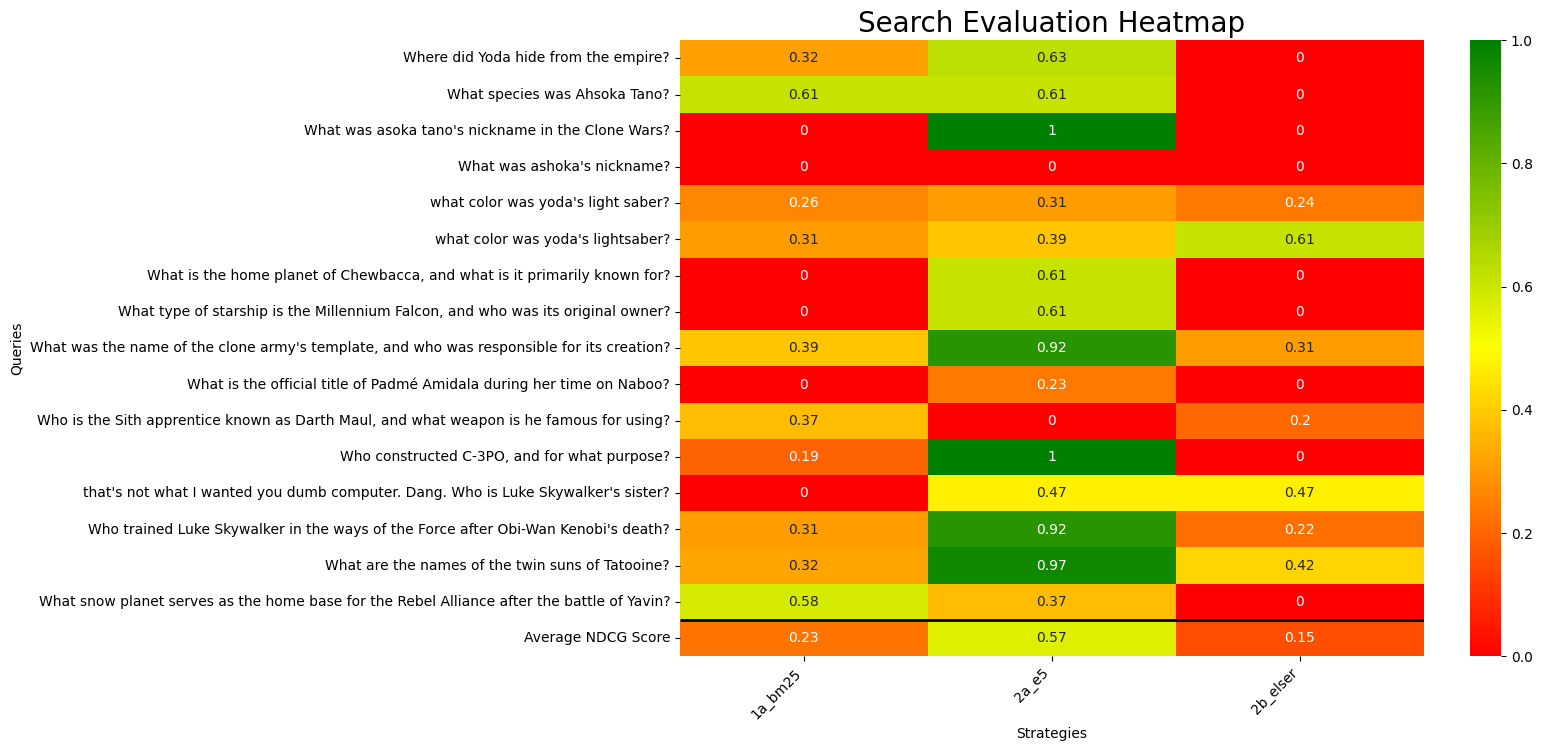

In [3]:
## Visualize the Results of the Evaluation

# 6. Visualize
vis_search_eval_json(OUTPUT_JSON)